In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('nyc_listings.csv')

In [3]:
df.drop(['listing_url'], axis = 1, inplace = True)
df.drop(['scrape_id'], axis = 1, inplace = True)
df.drop(['last_scraped'], axis = 1, inplace = True)
df.drop(['name'], axis = 1, inplace = True)
df.drop(['description'], axis = 1, inplace = True)
df.drop(['neighborhood_overview'], axis = 1, inplace = True)
df.drop(['picture_url'], axis = 1, inplace = True)
df.drop(['host_url'], axis = 1, inplace = True)
df.drop(['host_name'], axis = 1, inplace = True)
df.drop(['host_since'], axis = 1, inplace = True)
df.drop(['host_location'], axis = 1, inplace = True)
df.drop(['host_about'], axis = 1, inplace = True)
df.drop(['host_thumbnail_url'], axis = 1, inplace = True)
df.drop(['host_picture_url'], axis = 1, inplace = True)
df.drop(['host_neighbourhood'], axis = 1, inplace = True)
df.drop(['host_has_profile_pic'], axis = 1, inplace = True)
df.drop(['neighbourhood'], axis = 1, inplace = True)
df.drop(['latitude'], axis = 1, inplace = True)
df.drop(['longitude'], axis = 1, inplace = True)
df.drop(['bathrooms'], axis = 1, inplace = True)
df.drop(['calendar_updated'], axis = 1, inplace = True)
df.drop(['calendar_last_scraped'], axis = 1, inplace = True)
df.drop(['first_review'], axis = 1, inplace = True)
df.drop(['last_review'], axis = 1, inplace = True)
df.drop(['license'], axis = 1, inplace = True)

In [4]:
df.dtypes
# do we care about id, name, host_id, host_name (identifiers)?

id                                                int64
host_id                                           int64
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_identity_verified                           object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            

In [5]:
df.isnull().sum()
# there is missing data! what do we do?!?

id                                                  0
host_id                                             0
host_response_time                              15743
host_response_rate                              15743
host_acceptance_rate                            15102
host_is_superhost                                 111
host_listings_count                               111
host_total_listings_count                         111
host_verifications                                  0
host_identity_verified                            111
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms_text                                    105
bedrooms                                         3936
beds                                              611
amenities                   

In [6]:
df['has_availability'] = df['has_availability'].map({'t' : 1, 'f' : 0})
df['instant_bookable'] = df['instant_bookable'].map({'t' : 1, 'f' : 0})

In [7]:
df.dtypes

id                                                int64
host_id                                           int64
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                               object
host_identity_verified                           object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            

<AxesSubplot:>

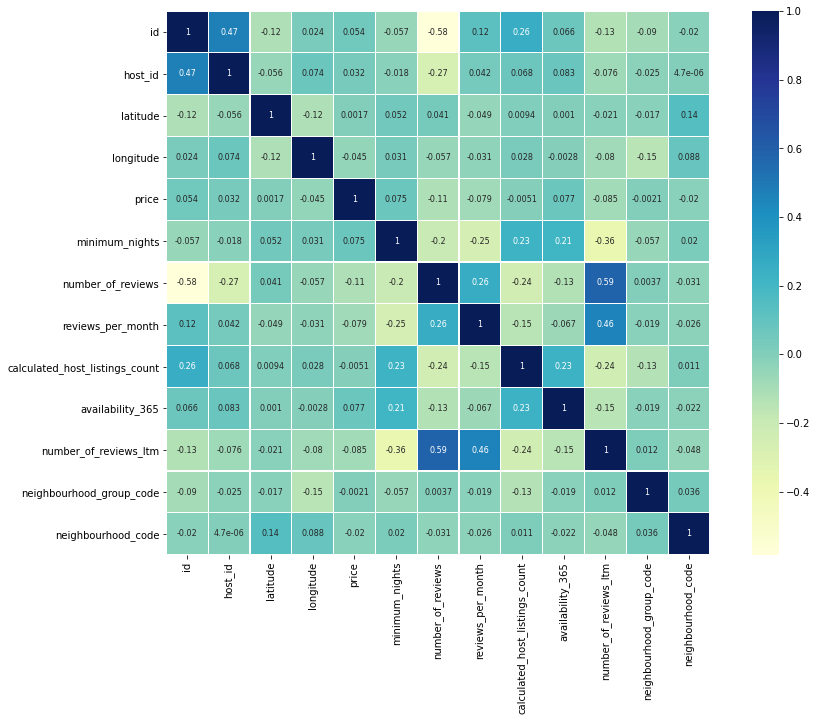

In [66]:
df.corr()
plt.rcParams['figure.figsize'] = [15, 10]
sn.heatmap(df.corr(), vmin=df.corr().values.min(), vmax=1, cmap="YlGnBu", square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":8})  